# MD Anderson - Site Engagement to Increase Screenings

Project Problem and Hypothesis

What's the project about? What problem are you solving?

Cancer reasearch publications, doctors and cancer survivors all agree and urge that early screening and detection is by far the most important driver to saving lives and easing cancer treatment. 
This project is using MD Anderson site traffic data to determine how to increase engagement with important conversion points on the site that drive referral and appointments. 


Where does this seem to reside as a machine learning problem? Are you predicting some continuous number, or predicting a binary value?

Predicting a continuous number over a time series. I want to predict the relationship between the CTA (call to action) "Request an Appointment" and site traffic referral types (initially). 



What kind of impact do you think it could have?
What do you think will have the most impact in predicting the value you are interested in solving for?

I have recently been transferred to a new client, MD Anderson Research Center based in Houston and believe understanding the relationship between site traffice design, referral types and possibly testing more copy and CTA methods. 

Dataset

In [31]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from numpy.random import randn
%matplotlib inline

data = pd.read_csv('./omnituremda.csv')


In [32]:
lm = LogisticRegression()

In [33]:
print data.head()

     Date   Site  Search Engine   Direct Entry   Other Websites  \
0  1/1/16  24398              16             20               1   
1  1/2/16  25723              20             15               4   
2  1/3/16  30018              22             18               4   
3  1/4/16  52082              77            102              12   
4  1/5/16  55670              78             87               7   

   Social Networks  Cancer Type  RA CTA  Donated   RA Conv  Unnamed: 10  
0                2          110      57       28  0.002336          NaN  
1                0           90      52       33  0.002022          NaN  
2                1          118      62       21  0.002065          NaN  
3                1          353     247       30  0.004743          NaN  
4                1          350     242       30  0.004347          NaN  


In [43]:
print data.describe()

               Site  Search Engine   Direct Entry   Other Websites  \
count     93.000000       93.000000      93.000000       93.000000   
mean   34252.698925      175.741935     198.806452       21.451613   
std     9723.723155       73.638055      91.011855        9.201271   
min    16881.000000       16.000000      15.000000        1.000000   
25%    26503.000000       99.000000      99.000000       14.000000   
50%    36188.000000      213.000000     248.000000       22.000000   
75%    39684.000000      234.000000     272.000000       28.000000   
max    55670.000000      285.000000     312.000000       42.000000   

       Social Networks  Cancer Type      RA CTA    Donated    RA Conv  \
count        93.000000    93.000000   93.000000  93.000000  93.000000   
mean          3.946237   679.193548  412.462366  39.193548   0.011971   
std           3.001324   273.996242  172.945679  14.625215   0.003741   
min           0.000000    90.000000   52.000000  15.000000   0.002022   
25% 

In [35]:
data.corr()

,Site,Search Engine,Direct Entry,Other Websites,Social Networks,Cancer Type,RA CTA,Donated,RA Conv,Unnamed: 10
Site,1.000000,0.460392,0.525106,0.434579,0.323692,0.479060,0.571093,0.383583,0.067115,NaN
Search Engine,0.460392,1.000000,0.965710,0.828317,0.590747,0.866196,0.978897,0.392068,0.875661,NaN
Direct Entry,0.525106,0.965710,1.000000,0.830758,0.599038,0.860911,0.991921,0.398646,0.855388,NaN
Other Websites,0.434579,0.828317,0.830758,1.000000,0.527521,0.749659,0.841703,0.312174,0.731559,NaN
Social Networks,0.323692,0.590747,0.599038,0.527521,1.000000,0.602143,0.598908,0.164664,0.469264,NaN
Cancer Type,0.479060,0.866196,0.860911,0.749659,0.602143,1.000000,0.875027,0.370807,0.734709,NaN
RA CTA,0.571093,0.978897,0.991921,0.841703,0.598908,0.875027,1.000000,0.414271,0.838572,NaN
Donated,0.383583,0.392068,0.398646,0.312174,0.164664,0.370807,0.414271,1.000000,0.248312,NaN
RA Conv,0.067115,0.875661,0.855388,0.731559,0.469264,0.734709,0.838572,0.248312,1.000000,NaN
Unnamed: 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


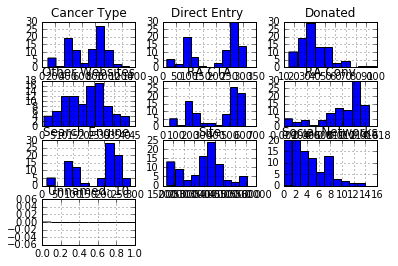

In [36]:
data.hist()
pl.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

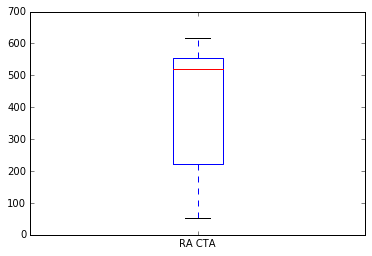

In [38]:
data['RA CTA'].plot(kind='box')

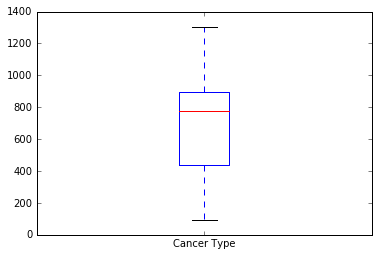

In [39]:
data['Cancer Type'].plot(kind='box')

In [41]:
data['RA Conv'].mean

<bound method Series.mean of 0      0.002336
1      0.002022
2      0.002065
3      0.004743
4      0.004347
5      0.004578
6      0.004994
7      0.005336
8      0.002827
9      0.003062
10     0.005387
11     0.011840
12     0.011318
13     0.010340
14     0.010845
15     0.007584
16     0.005438
17     0.009751
18     0.013963
19     0.012892
20     0.012847
21     0.013587
22     0.009011
23     0.009501
24     0.014962
25     0.013607
26     0.013389
27     0.014013
28     0.014038
29     0.010898
         ...   
139         NaN
140         NaN
141         NaN
142         NaN
143         NaN
144         NaN
145         NaN
146         NaN
147         NaN
148         NaN
149         NaN
150         NaN
151         NaN
152         NaN
153         NaN
154         NaN
155         NaN
156         NaN
157         NaN
158         NaN
159         NaN
160         NaN
161         NaN
162         NaN
163         NaN
164         NaN
165         NaN
166         NaN
167         NaN
168        

Domain knowledge

What experience do you already have around this area?

This will be the first project (client) I work on related to Cancer research. However, the goal is to understand how the results from the site traffic captured can impact how to iterate and explore content and site conversion strategy. 


Project Concerns

What questions do you have about your project? What are you not sure you quite yet understand? 

Site traffic can be limited, I also just got access to the data so I need to approach the project with a narrow window to find actionable insights. 


Outcomes


How complicated does your model have to be?

Simplicity is key, this model would help guide strategy and design most. The goal is to distill the model down to actionable recommendations for landing page test ideas. 

How successful does your project have to be in order to be considered a "success"?

Success means being able to predict varying behaviors for different women who have cancer and their access to healthcare because it will help idenitfy opportunties to drive the most effective awareness campaigns. 

What will you do if the project is a bust (this happens! but it shouldn't here)?

There are some other features I can try to use if I find that there are no relationships between cancer patients and their lifestyle habits and access to healthcare. 